In [106]:
from __future__ import print_function, division, absolute_import
import os
import sys
sys.path.insert(0, "C:\\Users\\Matt\\Desktop\\orbithunter\\")
from orbithunter import *
import numpy as np
import itertools
from math import pi
import time
import matplotlib.pyplot as plt
import h5py
import orbithunter.persistent_homology as ohgudhi
import gudhi
score_type='persistence'
scoring_function = ohgudhi.gudhi_distance_from_persistence
persistence_function = ohgudhi.orbit_persistence

def critical_values(scores):
    cval = [0.0001, 0.001, 0.01, 0.05]
    return np.array([np.quantile(scores, q) for q in cval])


def produce_scores(family, bases, **kwargs):
    # Make it so group orbit must be passed, not calculated here. 
    family_scores = None
    print('[', end='')
    n = 0 
    n_samples = len(family)*len(bases)
    for window in family:
        print('/'.join([str(n), str(n_samples)]))
        window = window.transform(to='field')
        for base in bases:
            scr = scan(base, window, **kwargs)[0].ravel()
            if family_scores is None:
                family_scores = np.zeros([n_samples, len(scr)])                             
            family_scores[n, :] = np.array(scr).ravel()
            n+=1
    print(']',end='')
    return family_scores.reshape(len(family), -1)

In [107]:
patches = read_h5('large_patches.h5')

In [115]:
nextiter = np.ones([8192, 8192])

In [118]:
%%timeit
nextiter = np.ones([8192, 8192])
for i in range(10):
    nextiter = i + nextiter

2.52 s ± 69.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [126]:
?np.array([1]).__iadd__

Object `np.array([1]).__iadd__` not found.


In [140]:
class iaddOrbitKS(OrbitKS):
    def __iadd__(self, num):
        self.state += num
        return self

In [148]:
%%timeit
test = iaddOrbitKS(**vars(orbit))
test += 2

21 µs ± 1.62 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [149]:
%%timeit
test = OrbitKS(**vars(orbit))
test = test + 2

32.2 µs ± 2.22 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [147]:
the_state = test.state.copy()
the_state

array([[4.        , 4.15611452, 4.40433151, ..., 3.19886396, 3.59566849,
        3.84388548],
       [4.        , 4.14727329, 4.38647981, ..., 3.22370251, 3.61352019,
        3.85272671],
       [4.        , 4.14824505, 4.38719546, ..., 3.22368871, 3.61280454,
        3.85175495],
       ...,
       [4.        , 4.24405374, 4.57222354, ..., 2.97640047, 3.42777646,
        3.75594626],
       [4.        , 4.20457755, 4.49752901, ..., 3.07420328, 3.50247099,
        3.79542245],
       [4.        , 4.1751716 , 4.44132646, ..., 3.14887742, 3.55867354,
        3.8248284 ]])

In [146]:
test.state

array([[6.        , 6.15611452, 6.40433151, ..., 5.19886396, 5.59566849,
        5.84388548],
       [6.        , 6.14727329, 6.38647981, ..., 5.22370251, 5.61352019,
        5.85272671],
       [6.        , 6.14824505, 6.38719546, ..., 5.22368871, 5.61280454,
        5.85175495],
       ...,
       [6.        , 6.24405374, 6.57222354, ..., 4.97640047, 5.42777646,
        5.75594626],
       [6.        , 6.20457755, 6.49752901, ..., 5.07420328, 5.50247099,
        5.79542245],
       [6.        , 6.1751716 , 6.44132646, ..., 5.14887742, 5.55867354,
        5.8248284 ]])

In [150]:
np.zeros([32, 32]) % np.ones([32, 32])

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [124]:
dir()

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__

In [119]:
%%timeit
nextiter = np.ones([8192, 8192])
for i in range(10):
    nextiter += i

761 ms ± 22.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [109]:
for patch in patches:
    patch.resize(832, 832).transform(to='field').to_h5('large_patches.h5', verbose=True)

Writing dataset "/0" to file large_patches.h5
Writing dataset "/1" to file large_patches.h5
Writing dataset "/2" to file large_patches.h5
Writing dataset "/3" to file large_patches.h5
Writing dataset "/4" to file large_patches.h5
Writing dataset "/5" to file large_patches.h5
Writing dataset "/6" to file large_patches.h5
Writing dataset "/7" to file large_patches.h5
Writing dataset "/8" to file large_patches.h5
Writing dataset "/9" to file large_patches.h5
Writing dataset "/10" to file large_patches.h5
Writing dataset "/11" to file large_patches.h5
Writing dataset "/12" to file large_patches.h5
Writing dataset "/13" to file large_patches.h5
Writing dataset "/14" to file large_patches.h5
Writing dataset "/15" to file large_patches.h5
Writing dataset "/16" to file large_patches.h5
Writing dataset "/17" to file large_patches.h5
Writing dataset "/18" to file large_patches.h5
Writing dataset "/19" to file large_patches.h5
Writing dataset "/20" to file large_patches.h5
Writing dataset "/21" t

Writing dataset "/173" to file large_patches.h5
Writing dataset "/174" to file large_patches.h5
Writing dataset "/175" to file large_patches.h5
Writing dataset "/176" to file large_patches.h5
Writing dataset "/177" to file large_patches.h5
Writing dataset "/178" to file large_patches.h5
Writing dataset "/179" to file large_patches.h5
Writing dataset "/180" to file large_patches.h5
Writing dataset "/181" to file large_patches.h5
Writing dataset "/182" to file large_patches.h5
Writing dataset "/183" to file large_patches.h5
Writing dataset "/184" to file large_patches.h5
Writing dataset "/185" to file large_patches.h5
Writing dataset "/186" to file large_patches.h5
Writing dataset "/187" to file large_patches.h5
Writing dataset "/188" to file large_patches.h5
Writing dataset "/189" to file large_patches.h5
Writing dataset "/190" to file large_patches.h5
Writing dataset "/191" to file large_patches.h5
Writing dataset "/192" to file large_patches.h5
Writing dataset "/193" to file large_pat

Writing dataset "/344" to file large_patches.h5
Writing dataset "/345" to file large_patches.h5
Writing dataset "/346" to file large_patches.h5
Writing dataset "/347" to file large_patches.h5
Writing dataset "/348" to file large_patches.h5
Writing dataset "/349" to file large_patches.h5
Writing dataset "/350" to file large_patches.h5
Writing dataset "/351" to file large_patches.h5
Writing dataset "/352" to file large_patches.h5
Writing dataset "/353" to file large_patches.h5
Writing dataset "/354" to file large_patches.h5
Writing dataset "/355" to file large_patches.h5
Writing dataset "/356" to file large_patches.h5
Writing dataset "/357" to file large_patches.h5
Writing dataset "/358" to file large_patches.h5
Writing dataset "/359" to file large_patches.h5
Writing dataset "/360" to file large_patches.h5
Writing dataset "/361" to file large_patches.h5
Writing dataset "/362" to file large_patches.h5
Writing dataset "/363" to file large_patches.h5
Writing dataset "/364" to file large_pat

Writing dataset "/515" to file large_patches.h5
Writing dataset "/516" to file large_patches.h5
Writing dataset "/517" to file large_patches.h5
Writing dataset "/518" to file large_patches.h5
Writing dataset "/519" to file large_patches.h5
Writing dataset "/520" to file large_patches.h5
Writing dataset "/521" to file large_patches.h5
Writing dataset "/522" to file large_patches.h5
Writing dataset "/523" to file large_patches.h5
Writing dataset "/524" to file large_patches.h5
Writing dataset "/525" to file large_patches.h5
Writing dataset "/526" to file large_patches.h5
Writing dataset "/527" to file large_patches.h5
Writing dataset "/528" to file large_patches.h5
Writing dataset "/529" to file large_patches.h5
Writing dataset "/530" to file large_patches.h5
Writing dataset "/531" to file large_patches.h5
Writing dataset "/532" to file large_patches.h5
Writing dataset "/533" to file large_patches.h5
Writing dataset "/534" to file large_patches.h5
Writing dataset "/535" to file large_pat

Writing dataset "/686" to file large_patches.h5
Writing dataset "/687" to file large_patches.h5
Writing dataset "/688" to file large_patches.h5
Writing dataset "/689" to file large_patches.h5
Writing dataset "/690" to file large_patches.h5
Writing dataset "/691" to file large_patches.h5
Writing dataset "/692" to file large_patches.h5
Writing dataset "/693" to file large_patches.h5
Writing dataset "/694" to file large_patches.h5
Writing dataset "/695" to file large_patches.h5
Writing dataset "/696" to file large_patches.h5
Writing dataset "/697" to file large_patches.h5
Writing dataset "/698" to file large_patches.h5
Writing dataset "/699" to file large_patches.h5
Writing dataset "/700" to file large_patches.h5
Writing dataset "/701" to file large_patches.h5
Writing dataset "/702" to file large_patches.h5
Writing dataset "/703" to file large_patches.h5
Writing dataset "/704" to file large_patches.h5
Writing dataset "/705" to file large_patches.h5
Writing dataset "/706" to file large_pat

Writing dataset "/857" to file large_patches.h5
Writing dataset "/858" to file large_patches.h5
Writing dataset "/859" to file large_patches.h5
Writing dataset "/860" to file large_patches.h5
Writing dataset "/861" to file large_patches.h5
Writing dataset "/862" to file large_patches.h5
Writing dataset "/863" to file large_patches.h5
Writing dataset "/864" to file large_patches.h5
Writing dataset "/865" to file large_patches.h5
Writing dataset "/866" to file large_patches.h5
Writing dataset "/867" to file large_patches.h5
Writing dataset "/868" to file large_patches.h5
Writing dataset "/869" to file large_patches.h5
Writing dataset "/870" to file large_patches.h5
Writing dataset "/871" to file large_patches.h5
Writing dataset "/872" to file large_patches.h5
Writing dataset "/873" to file large_patches.h5
Writing dataset "/874" to file large_patches.h5
Writing dataset "/875" to file large_patches.h5
Writing dataset "/876" to file large_patches.h5
Writing dataset "/877" to file large_pat

Writing dataset "/1028" to file large_patches.h5
Writing dataset "/1029" to file large_patches.h5
Writing dataset "/1030" to file large_patches.h5
Writing dataset "/1031" to file large_patches.h5
Writing dataset "/1032" to file large_patches.h5
Writing dataset "/1033" to file large_patches.h5
Writing dataset "/1034" to file large_patches.h5
Writing dataset "/1035" to file large_patches.h5
Writing dataset "/1036" to file large_patches.h5
Writing dataset "/1037" to file large_patches.h5
Writing dataset "/1038" to file large_patches.h5
Writing dataset "/1039" to file large_patches.h5
Writing dataset "/1040" to file large_patches.h5
Writing dataset "/1041" to file large_patches.h5
Writing dataset "/1042" to file large_patches.h5
Writing dataset "/1043" to file large_patches.h5
Writing dataset "/1044" to file large_patches.h5
Writing dataset "/1045" to file large_patches.h5
Writing dataset "/1046" to file large_patches.h5
Writing dataset "/1047" to file large_patches.h5
Writing dataset "/10

Writing dataset "/1196" to file large_patches.h5
Writing dataset "/1197" to file large_patches.h5
Writing dataset "/1198" to file large_patches.h5
Writing dataset "/1199" to file large_patches.h5
Writing dataset "/1200" to file large_patches.h5
Writing dataset "/1201" to file large_patches.h5
Writing dataset "/1202" to file large_patches.h5
Writing dataset "/1203" to file large_patches.h5
Writing dataset "/1204" to file large_patches.h5
Writing dataset "/1205" to file large_patches.h5
Writing dataset "/1206" to file large_patches.h5
Writing dataset "/1207" to file large_patches.h5
Writing dataset "/1208" to file large_patches.h5
Writing dataset "/1209" to file large_patches.h5
Writing dataset "/1210" to file large_patches.h5
Writing dataset "/1211" to file large_patches.h5
Writing dataset "/1212" to file large_patches.h5
Writing dataset "/1213" to file large_patches.h5
Writing dataset "/1214" to file large_patches.h5
Writing dataset "/1215" to file large_patches.h5
Writing dataset "/12

In [ ]:
with h5py.File('large_patches.h5', 'r+') as file:
    for x in file:
        file[x] = 

In [ ]:
base = read_h5('large_patches.h5', '/1').resize(832, 832).transform(to='field')
base.plot()

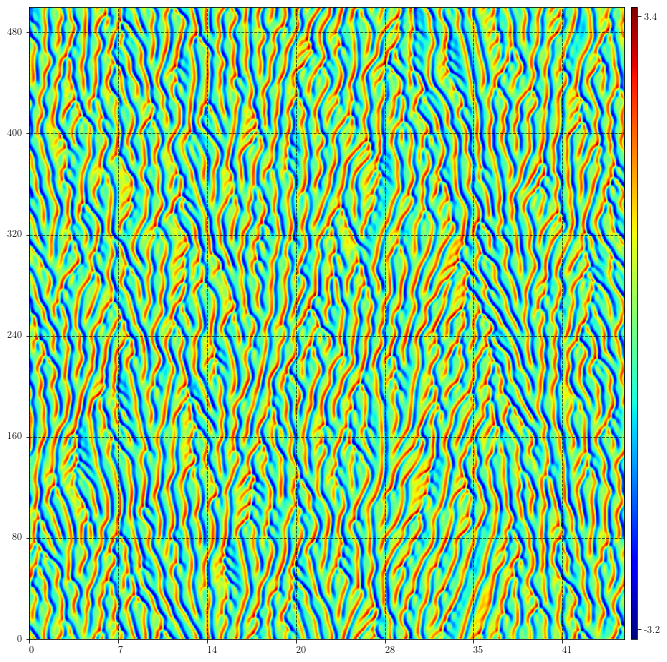

In [38]:
covering = [sorted([x.transform(to='field') for x in family], key=lambda o:o.x) for family in read_h5('continuation.h5')]
base = read_h5('large_patches.h5', '/1').resize(832, 832).transform(to='field')
base.plot()

# Shadowing

Before we can talk about the statistics and proportion of space-time that each orbit family covers,
we must first determine the baselines/threshold values for the shadowing metric. The most important
reason is simply to get a threshold value which is non-arbitary, based upon the distribution of this metric when
ranging over families, group orbits, and arbitrary trajectory segments in space-time. The second reason is to
delve into the details of the families themselves. As we shall see, not every orbit reached by numerical continuation is necessarily in the same continuous family. If accidentally mixed, then the thresholds as determined by the
distributions of the shadowing metric likely do not make sense. Persistent homology is used towards this end. It provides a guide for how to determine both the sampling and bounds of the members of each family to be used
as our covering set.

## Defect family investigation

Before jumping into the full problem, i.e. before using multiple continuous families, let us first investigate
a single family. To do so, we can import the previously derived family (produced via continuation).

In [39]:
# covering = read_h5('../../notebooks/covering_old.h5')
# covering = read_h5('continuation_covering.h5')
# covering = [np.array([x.transform(to='field') for x in fam]) for fam in covering]
defect_family = covering[0]
family_size = [len(x) for x in covering]

In [40]:
defect_family = sorted(covering[0], key=lambda x : x.t)
drifter_family = sorted(covering[1], key=lambda x : x.t)
large_defect_family = sorted(covering[2], key=lambda x : x.t)
# streak_family = sorted(covering[3], key=lambda x : x.x)#[7:22]
wiggle_family = sorted(covering[3], key=lambda x : x.t)

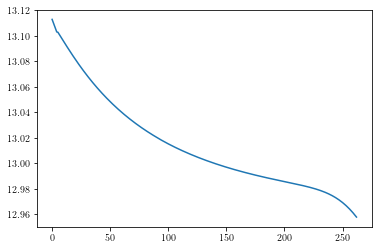

In [41]:
plt.plot([x.x for x in defect_family])

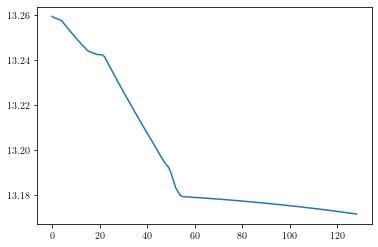

In [42]:
plt.plot([x.x for x in drifter_family])

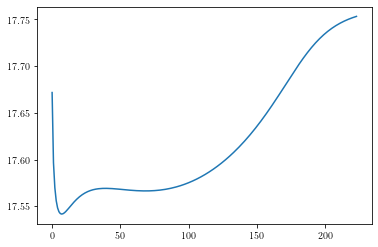

In [43]:
plt.plot([x.x for x in large_defect_family])

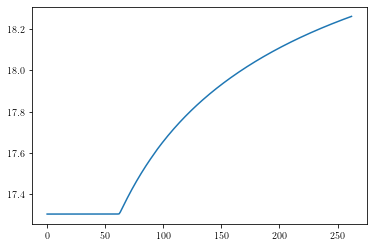

In [44]:
plt.plot([x.x for x in wiggle_family])

In [45]:
covering_families = [defect_family, drifter_family, large_defect_family, wiggle_family]
entire_covering = [o for fam in covering_families for o in fam]
# entire_covering_reordered = [sorted(defect_family+drifter_family+large_defect_family,key=lambda x : x.x), wiggle_family]
# entire_covering_reordered = [o.transform(to='field') for fam in entire_covering_reordered for o in fam]

First, a quick glimpse through example orbits reached by continuation. 

### Methodology

To collect our distribution of the amplitude difference metric, there are three choices to be made.

    1. The base orbits to scan over
    2. How often to sample them (i.e. how many window positions to compute the amplitude difference).
    3. How many group orbit members to use for each window orbit.
    
For the preliminary investigations, thirty different trajectory segments produced by integration are used, each of which has large spatiotemporal area. To reduce their relations to one another, the trajectory segments are part of a very long trajectory which has been chopped into pieces. Every other piece is collected to be used as a base orbit. Clearly if regions of space-time can be strongly correlated when separated by 500 dimensionless time units, this breaks down.

Instead of exhaustively computing the statistic; for every position for each group orbit member in each family, the
sampling is done by taking a subset of the group orbit members and a subset of the positions; for each member of the
continuous family defined in ```defect_family```
    
Additionally, the windows are rediscretized to abide by the same grid spacing as the base orbit as clearly
shadowings are assumed to be the same size as the orbits they shadow. 

In [11]:
# sampling_rate = 30
# bases_labels = [str(int(base_num*sampling_rate))for base_num in range(1000//sampling_rate)]
# bases = [y.resize(832, 832) for y in  read_h5('../notebooks/large_patches.h5', tuple(bases_labels))]

In [26]:
sampling_rate = 1
bases_labels = [str(int(base_num*sampling_rate))for base_num in range(1000//sampling_rate)]
bases = [y for y in  read_h5('../notebooks/small_patches.h5', tuple(bases_labels))]

To compute the amplitude differences, iterate over the windows (family members), each window's group orbit (taken to be discrete subgroup for this run, and the 30 base orbits (trajectories). 

#### Group orbit distribution of amplitude difference $|u^2 - v^2|$ metric

In [69]:
kwargs = {          
          'strides': (64, 64),
#           'rolls': (4, 4),
          'fundamental_domain': False,
#           'scoring_function':  scoring_function,
#           'score_type': 'persistence',
#           'persistence_function': persistence_function,
          'group_orbit': False,
          'n_trajectories':1000,
          'sampling_rate':10
           }

defect_family_scores = produce_scores([x for x in defect_family[::10]], bases[::2], **kwargs)

[0/13500 500/13500 1000/13500 1500/13500 2000/13500 2500/13500 3000/13500 3500/13500 4000/13500 4500/13500 5000/13500 5500/13500 6000/13500 6500/13500 7000/13500 7500/13500 8000/13500 8500/13500 9000/13500 9500/13500 10000/13500 10500/13500 11000/13500 11500/13500 12000/13500 12500/13500 13000/13500 ]

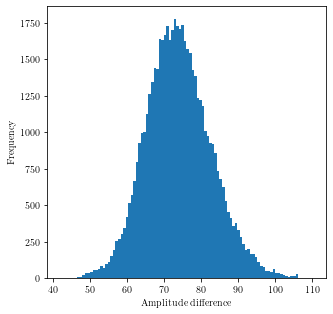

In [70]:
fig, ax1 = plt.subplots(1, 1, figsize=(5,5))
ax1.hist(defect_family_scores.ravel(), bins=100)
ax1.set_ylabel('Frequency')
ax1.set_xlabel('Amplitude difference')
plt.show()

In [71]:
defect_family_scores.reshape(27,-1).shape

(27, 2000)

The distribution for each family member (all group orbit members included) can be overlaid on top of one another to approximate whether the variables can be treated as IID or not. 



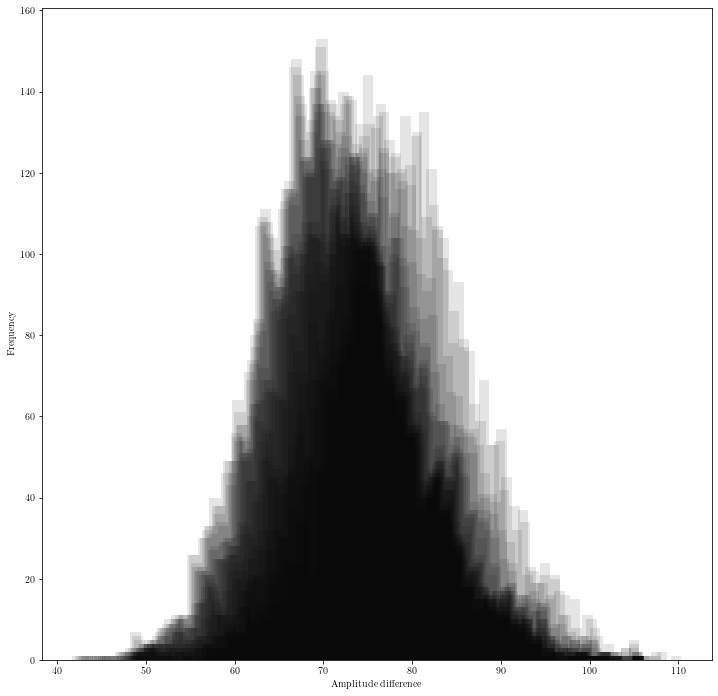

In [72]:
plt.figure(figsize=(12,12))
for g in defect_family_scores.reshape(len(defect_family[::10]), -1):
    plt.hist(g.ravel(), alpha=0.1, color='black', bins=50)
plt.ylabel('Frequency')
plt.xlabel('Amplitude difference')
plt.show()

In [73]:
# kwargs = {          
#           'strides': (64, 64),
# #           'rolls': (4, 4),
#           'fundamental_domain': False,
# #           'scoring_function':  scoring_function,
# #           'score_type': 'persistence',
# #           'persistence_function': persistence_function,
#           'group_orbit': True,
#           'n_trajectories':1000,
#           'sampling_rate':1,
#            'fundamental_domain':True,
#              'rolls'(8,8)
#            }

kwargs = {          
          'strides': (64, 64),
#           'rolls': (4, 4),
          'fundamental_domain': False,
#           'scoring_function':  scoring_function,
#           'score_type': 'persistence',
#           'persistence_function': persistence_function,
          'n_trajectories':1000,
          'sampling_rate':10
           }
group_orbit = tuple(defect_family[-200].group_orbit(rolls=(8,8)))
defect_group_orbit_scores = produce_scores(group_orbit, bases[::10], **kwargs)

[0/3200 100/3200 200/3200 300/3200 400/3200 500/3200 600/3200 700/3200 800/3200 900/3200 1000/3200 1100/3200 1200/3200 1300/3200 1400/3200 1500/3200 1600/3200 1700/3200 1800/3200 1900/3200 2000/3200 2100/3200 2200/3200 2300/3200 2400/3200 2500/3200 2600/3200 2700/3200 2800/3200 2900/3200 3000/3200 3100/3200 ]

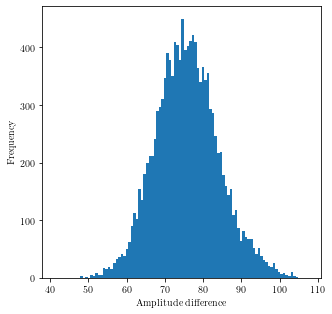

In [74]:
fig, ax1 = plt.subplots(1, 1, figsize=(5,5))
ax1.hist(defect_group_orbit_scores.ravel(), bins=100)
ax1.set_ylabel('Frequency')
ax1.set_xlabel('Amplitude difference')
plt.show()

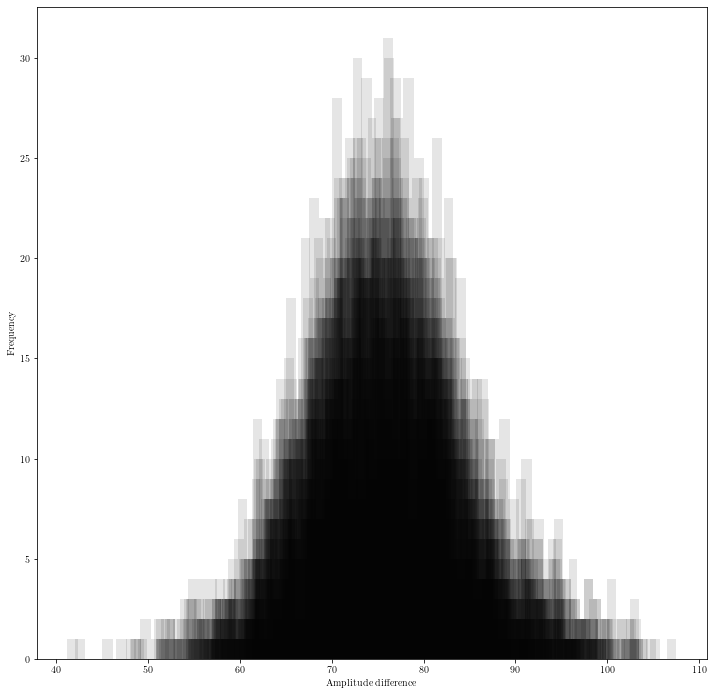

In [75]:
plt.figure(figsize=(12,12))
for g in defect_group_orbit_scores.reshape(len(tuple(defect_family[-200].group_orbit(rolls=(8,8)))),-1):
    plt.hist(g.ravel(), alpha=0.1, color='black', bins=50)
plt.ylabel('Frequency')
plt.xlabel('Amplitude difference')
plt.show()

In [79]:
kwargs = {          
          'strides': (64, 64),
#           'rolls': (4, 4),
          'fundamental_domain': False,
          'scoring_function':  scoring_function,
          'score_type': 'persistence',
          'persistence_function': persistence_function,
           }
group_orbit_persistence = tuple(defect_family[-200].group_orbit(rolls=(8,8)))
defect_group_orbit_persistence_scores = produce_scores(group_orbit_persistence, bases[::10],  **kwargs)

[0/3200 100/3200 200/3200 300/3200 400/3200 500/3200 600/3200 700/3200 800/3200 900/3200 1000/3200 1100/3200 1200/3200 1300/3200 1400/3200 1500/3200 1600/3200 1700/3200 1800/3200 1900/3200 2000/3200 2100/3200 2200/3200 2300/3200 2400/3200 2500/3200 2600/3200 2700/3200 2800/3200 2900/3200 3000/3200 3100/3200 ]

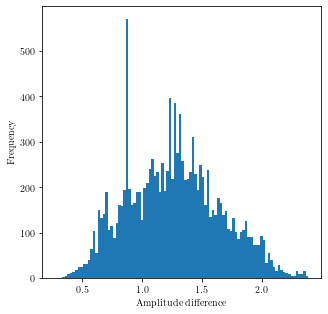

In [80]:
fig, ax1 = plt.subplots(1, 1, figsize=(5,5))
ax1.hist(defect_group_orbit_persistence_scores.ravel(), bins=100)
ax1.set_ylabel('Frequency')
ax1.set_xlabel('Amplitude difference')
plt.show()

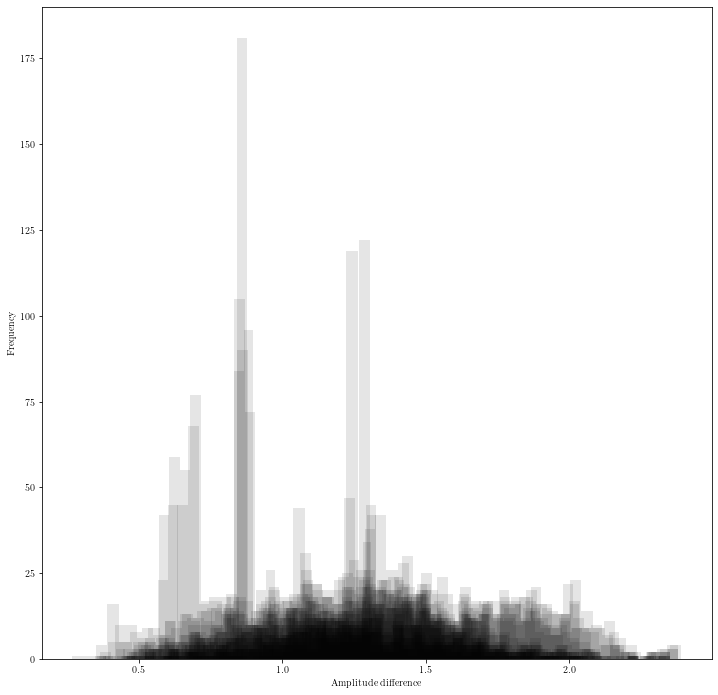

In [81]:
plt.figure(figsize=(12,12))
for g in defect_group_orbit_persistence_scores.reshape(len(tuple(defect_family[-200].group_orbit(rolls=(8,8)))),-1):
    plt.hist(g.ravel(), alpha=0.1, color='black', bins=50)
plt.ylabel('Frequency')
plt.xlabel('Amplitude difference')
plt.show()

Because we want thresholds for each family, it does not make sense to me to use a single threshold value if each
member has a different distribution. To determine the bounds of each family, I appeal to persistent homology;
specifically, the "bottleneck distance" between the family members. This is made accessible through the ```gudhi``` package, which I have built in some wrappers for.

In [ ]:
import orbithunter.persistent_homology as ohgudhi

Take the pairwise bottleneck distance between each family member and plot as as a symmetric matrix

#### Family partitionion based on persistent homology.

To really hammer the point home: even though we basically know how to split orbits up into families, based on the original continuation, compute ALL pointwise bottleneck distances.

absolute valued'

In [ ]:
all_persistences = []
for each_orbit in entire_covering:
    all_persistences.append(ohgudhi.orbit_complex(each_orbit.abs(),
                                                 ).persistence(min_persistence=0.01))
entirety_abs_homology_scores = np.zeros([len(all_persistences),len(all_persistences)])
for i in range(len(all_persistences)):
    for j in range(i, len(all_persistences)):
        entirety_abs_homology_scores[i, j] = ohgudhi.gudhi_distance_from_persistence(all_persistences[i], 
                                                                                 all_persistences[j],
                                                                                 metric='bottleneck')
        
entirety_abs_homology_scores = entirety_abs_homology_scores.reshape(len(all_persistences),len(all_persistences))

In [ ]:
abs_homology_scores = entirety_abs_homology_scores.copy()
plt.figure(figsize=(10,10))
plt.imshow(entirety_abs_homology_scores, interpolation='none')
plt.colorbar()
plt.show()

plt.figure(figsize=(10,10))
plt.imshow((entirety_abs_homology_scores+entirety_abs_homology_scores.T), interpolation='none')
plt.colorbar()
plt.show()

plt.imshow(((entirety_abs_homology_scores+entirety_abs_homology_scores.T) < 0.3).astype(int), interpolation='none')
plt.colorbar()
plt.show()

fundamental

In [ ]:
all_persistences = []
for each_orbit in entire_covering:
    all_persistences.append(ohgudhi.orbit_complex(each_orbit.to_fundamental_domain(), periodic_dimensions=(False, False)
                                                 ).persistence(min_persistence=0.01))
entirety_fundamental_homology_scores = np.zeros([len(all_persistences),len(all_persistences)])
for i in range(len(all_persistences)):
    for j in range(i, len(all_persistences)):
        entirety_fundamental_homology_scores[i, j] = ohgudhi.gudhi_distance_from_persistence(all_persistences[i], 
                                                                                 all_persistences[j],
                                                                                 metric='bottleneck')
        
entirety_fundamental_homology_scores = entirety_fundamental_homology_scores.reshape(len(all_persistences),len(all_persistences))

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(entirety_fundamental_homology_scores, interpolation='none')
plt.colorbar()
plt.show()

plt.figure(figsize=(10,10))
plt.imshow((entirety_fundamental_homology_scores+entirety_fundamental_homology_scores.T), interpolation='none')
plt.colorbar()
plt.show()

plt.imshow(((entirety_fundamental_homology_scores+entirety_fundamental_homology_scores.T) < 0.9).astype(int), interpolation='none')
plt.colorbar()
plt.show()

comoving

In [ ]:
all_persistences = []
for each_orbit in entire_covering:
    all_persistences.append(ohgudhi.orbit_complex(each_orbit,
                                                 ).persistence(min_persistence=0.01))
entirety_homology_scores = np.zeros([len(all_persistences),len(all_persistences)])
for i in range(len(all_persistences)):
    for j in range(i, len(all_persistences)):
        entirety_homology_scores[i, j] = ohgudhi.gudhi_distance_from_persistence(all_persistences[i], 
                                                                                 all_persistences[j],
                                                                                 metric='bottleneck')
        
homology_scores = entirety_homology_scores.reshape(len(all_persistences),len(all_persistences))

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(homology_scores, interpolation='none')
plt.colorbar()
plt.show()

plt.figure(figsize=(10,10))
plt.imshow((entirety_homology_scores+entirety_homology_scores.T), interpolation='none')
plt.colorbar()
plt.show()

plt.imshow(((entirety_homology_scores+entirety_homology_scores.T) < 0.9).astype(int), interpolation='none')
plt.colorbar()
plt.show()

Why is there coupling (the checkerboard pattern) instead of a block diagonal structure? (this is an arbitrary threshold mind you). It turns out that the first three "families"
are likely connected. The checkerboard pattern simply emerges from their arrangement. To provide evidence for this we can look at the 'families' members directly. For example. The first 5 or so members of the first family seem coupled to the second family.

(8.500844832189564, 13.102649046003444)


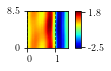

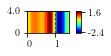

(8.600844832189562, 13.101183618599658)


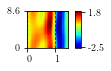

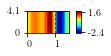

(8.70084483218956, 13.099734162363278)


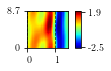

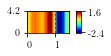

(8.800844832189558, 13.098281067851403)


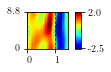

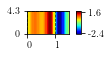

(8.900844832189556, 13.096834075018071)


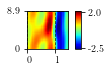

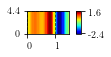

In [24]:
for x,y  in zip(defect_family[5:], drifter_family[:5]):
    print(x.dimensions())
    x.plot(), y.plot()

Likewise, there seeems to be strong similarity between the first and third families; they are essentially the same orbit but on different domain sizes. The connection between these two branches is elusive; hence the segmentation.

(32.31084483219184, 12.973721398833037)


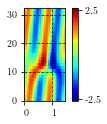

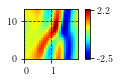

(31.310844832191798, 12.978045930356435)


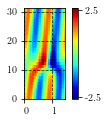

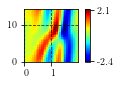

(30.31084483219164, 12.980951030532486)


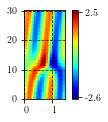

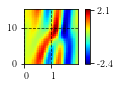

In [25]:
for x,y  in zip(np.array(defect_family)[[-20, -30, -40]], np.array(large_defect_family)[[10, 20, 30]]):
    print(x.dimensions())
    x.plot(), y.plot()

Combining these three branch segments and then ordering by temporal periods yields the following bottleneck distance matrix

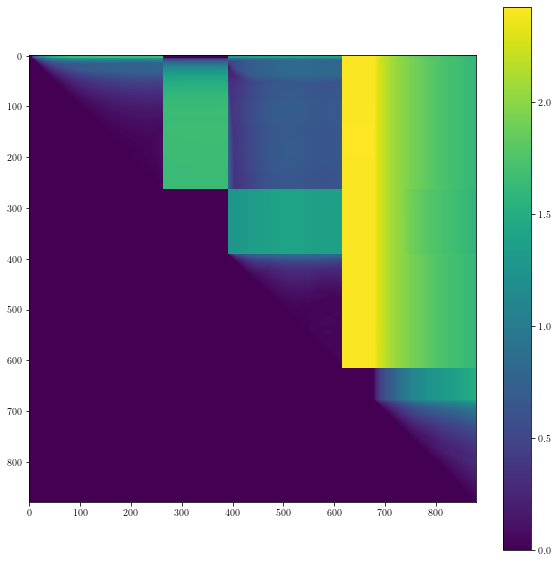

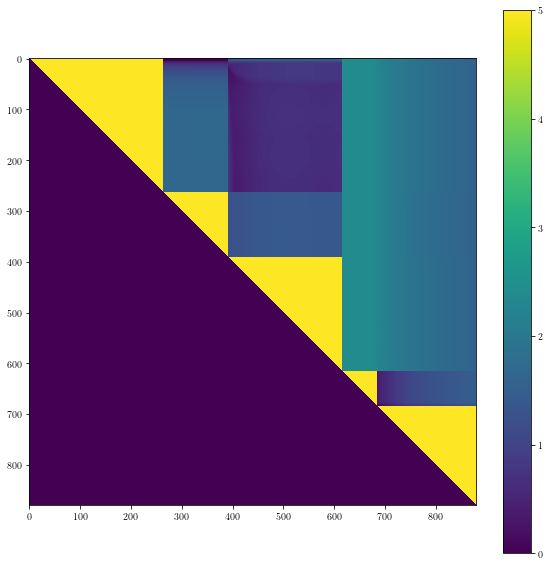

In [26]:
truth_values = homology_scores.copy()
plt.figure(figsize=(10,10))
plt.imshow(homology_scores, interpolation='none')
plt.colorbar()
plt.show()

for slc in [slice(0,263), slice(263, 392), slice(392, 616), slice(616, 685), slice(685, None)]:
    truth_values[slc, slc] = 5
truth_values=truth_values.T
truth_values[np.triu_indices(truth_values.shape[0], k=0)]=0
truth_values=truth_values.T

plt.figure(figsize=(10,10))
plt.imshow(truth_values, interpolation='none')
plt.colorbar()
plt.show()

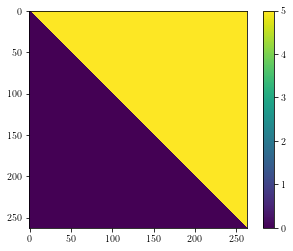

################################################


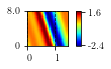

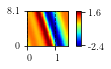

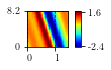

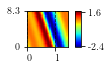

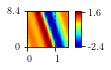

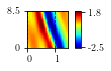

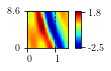

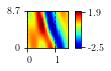

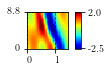

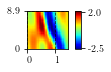

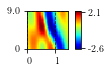

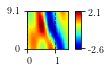

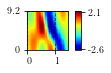

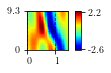

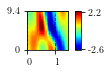

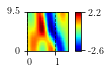

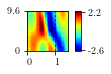

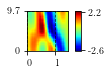

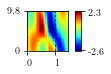

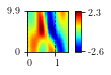

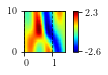

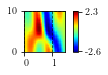

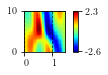

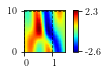

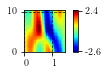

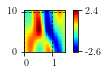

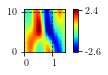

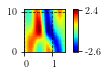

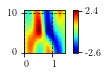

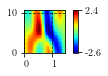

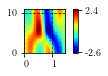

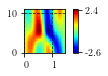

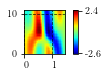

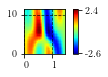

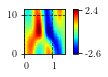

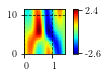

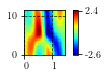

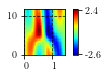

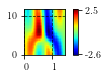

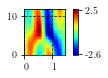

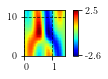

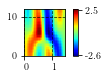

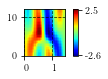

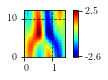

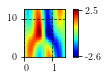

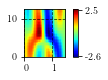

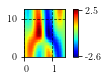

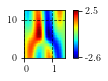

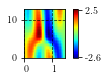

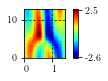

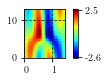

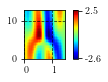

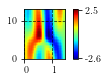

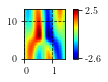

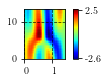

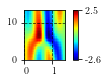

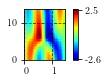

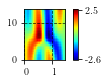

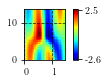

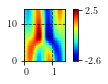

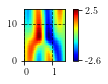

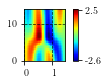

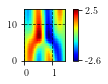

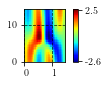

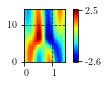

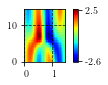

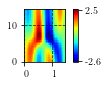

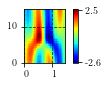

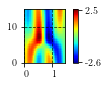

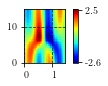

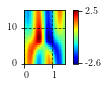

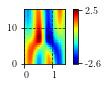

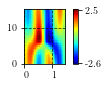

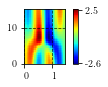

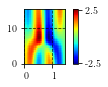

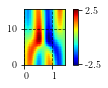

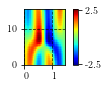

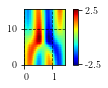

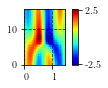

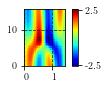

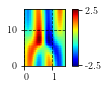

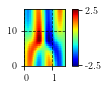

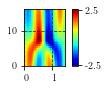

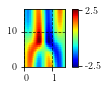

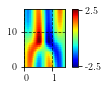

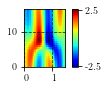

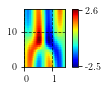

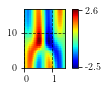

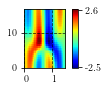

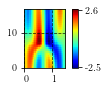

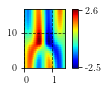

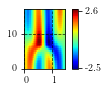

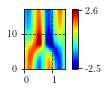

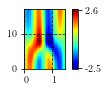

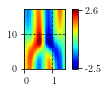

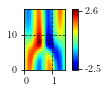

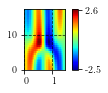

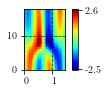

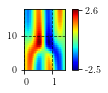

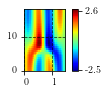

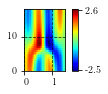

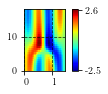

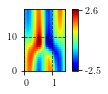

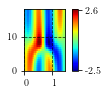

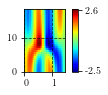

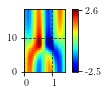

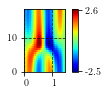

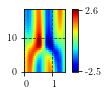

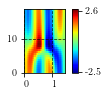

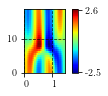

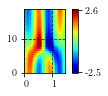

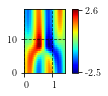

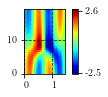

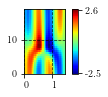

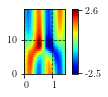

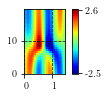

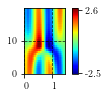

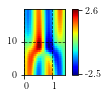

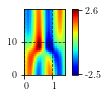

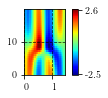

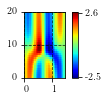

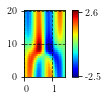

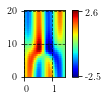

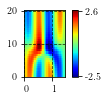

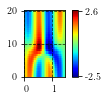

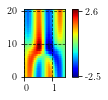

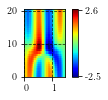

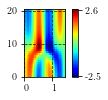

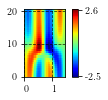

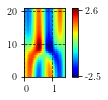

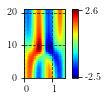

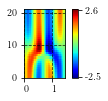

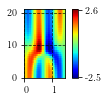

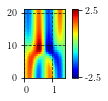

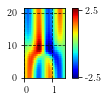

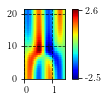

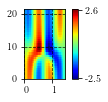

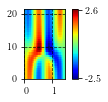

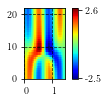

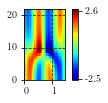

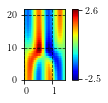

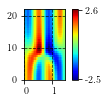

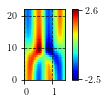

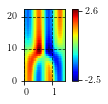

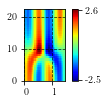

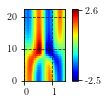

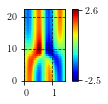

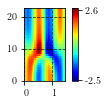

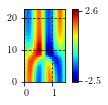

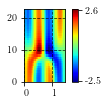

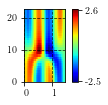

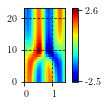

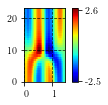

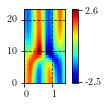

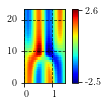

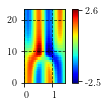

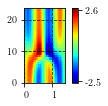

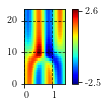

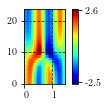

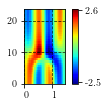

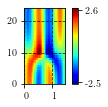

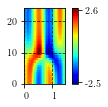

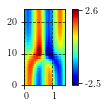

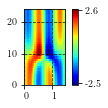

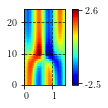

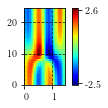

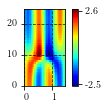

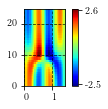

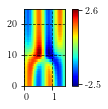

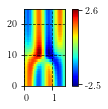

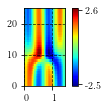

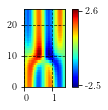

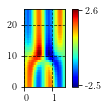

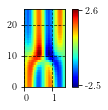

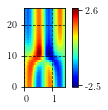

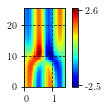

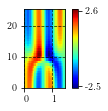

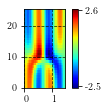

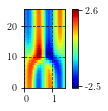

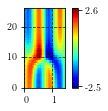

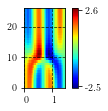

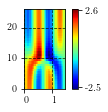

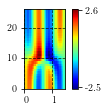

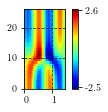

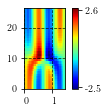

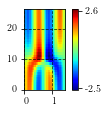

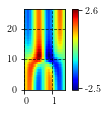

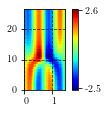

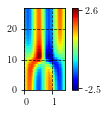

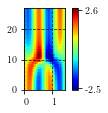

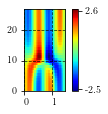

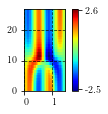

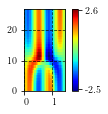

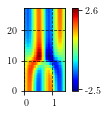

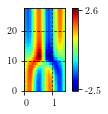

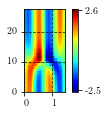

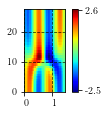

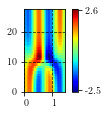

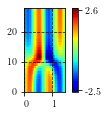

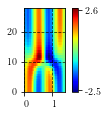

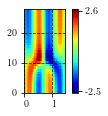

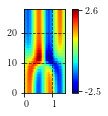

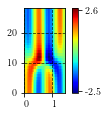

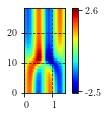

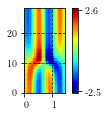

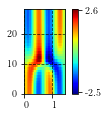

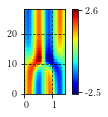

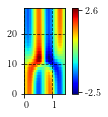

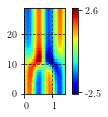

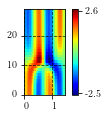

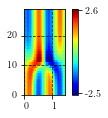

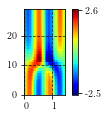

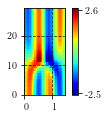

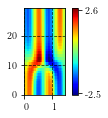

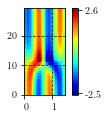

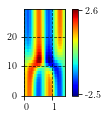

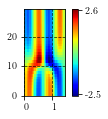

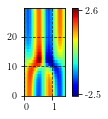

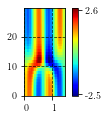

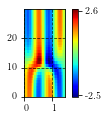

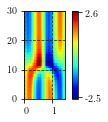

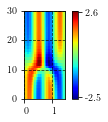

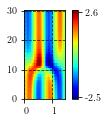

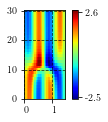

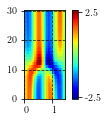

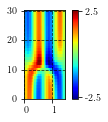

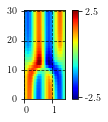

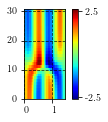

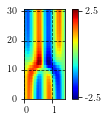

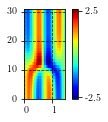

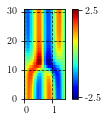

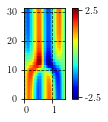

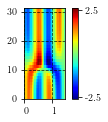

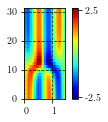

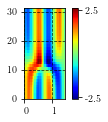

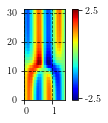

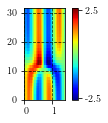

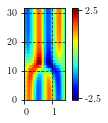

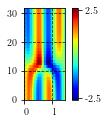

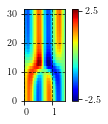

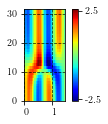

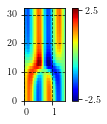

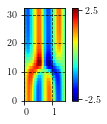

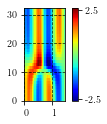

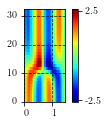

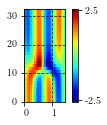

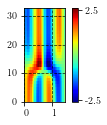

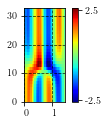

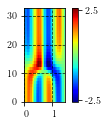

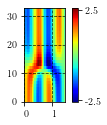

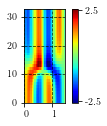

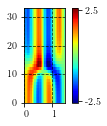

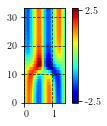

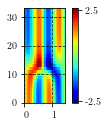

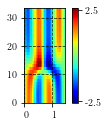

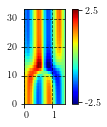

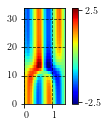

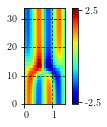

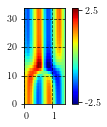

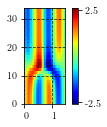

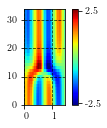

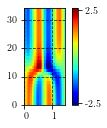

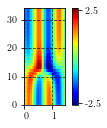

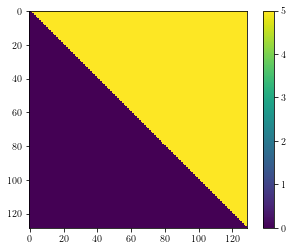

################################################


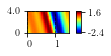

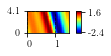

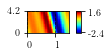

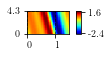

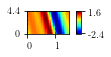

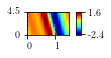

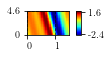

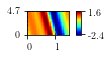

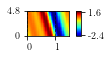

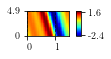

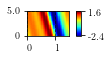

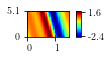

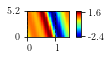

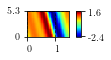

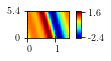

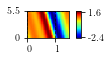

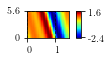

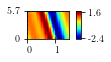

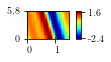

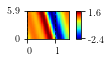

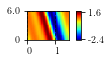

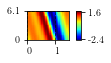

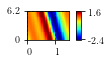

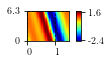

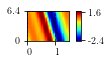

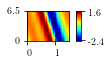

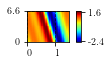

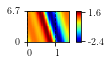

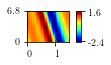

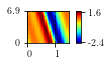

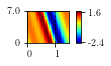

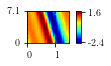

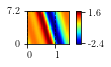

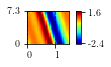

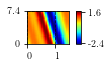

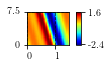

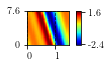

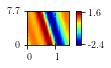

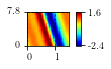

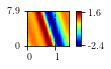

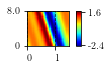

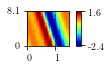

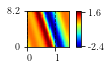

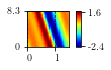

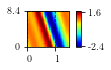

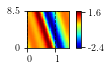

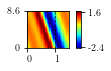

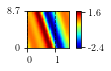

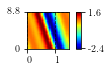

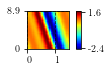

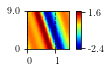

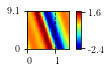

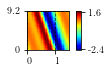

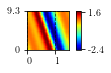

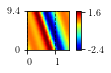

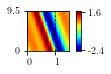

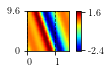

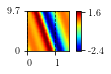

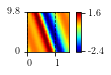

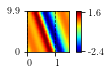

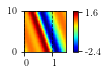

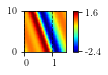

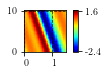

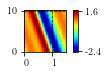

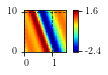

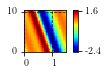

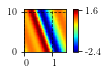

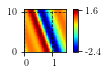

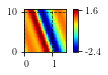

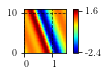

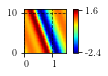

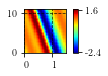

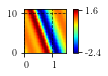

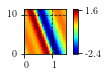

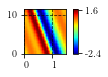

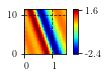

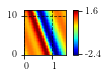

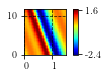

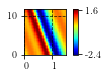

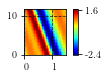

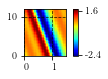

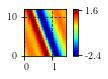

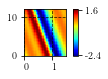

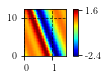

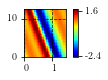

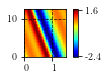

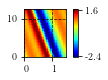

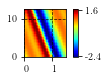

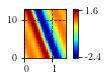

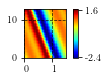

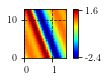

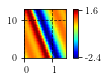

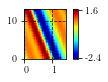

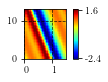

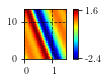

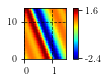

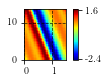

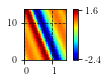

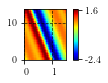

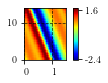

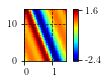

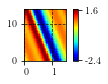

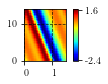

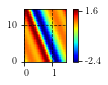

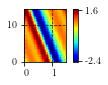

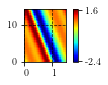

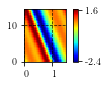

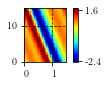

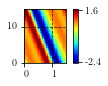

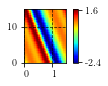

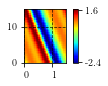

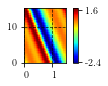

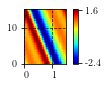

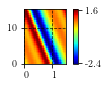

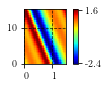

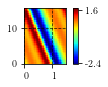

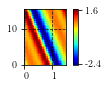

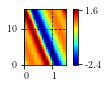

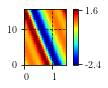

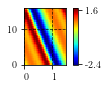

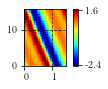

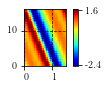

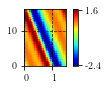

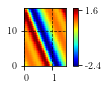

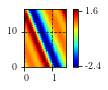

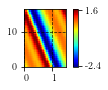

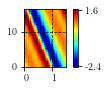

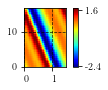

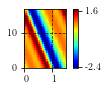

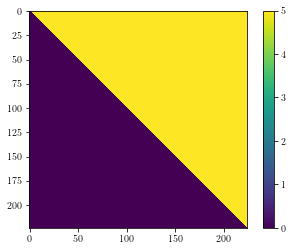

################################################


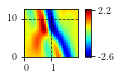

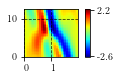

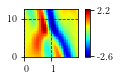

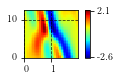

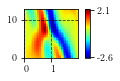

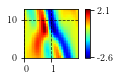

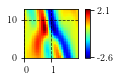

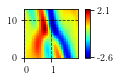

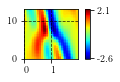

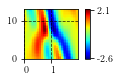

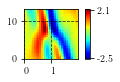

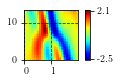

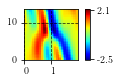

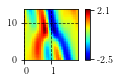

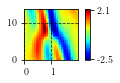

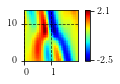

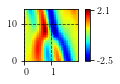

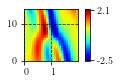

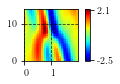

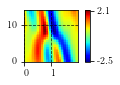

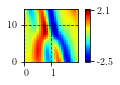

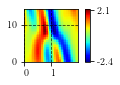

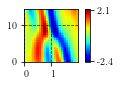

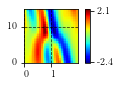

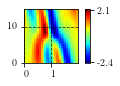

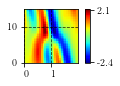

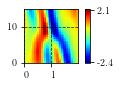

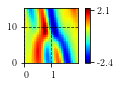

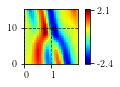

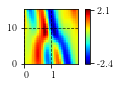

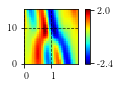

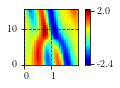

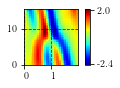

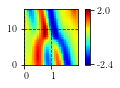

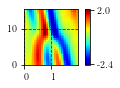

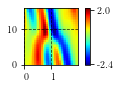

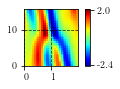

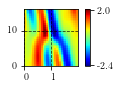

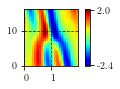

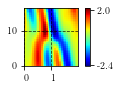

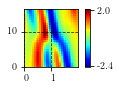

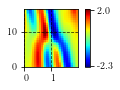

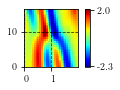

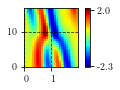

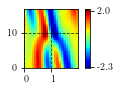

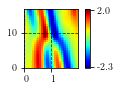

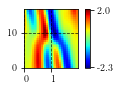

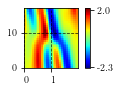

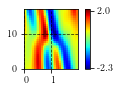

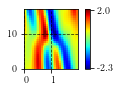

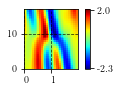

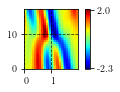

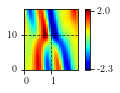

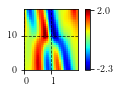

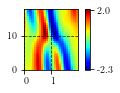

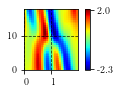

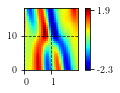

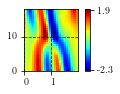

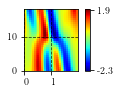

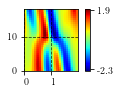

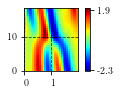

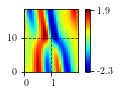

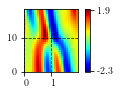

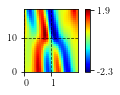

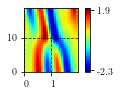

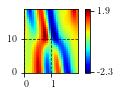

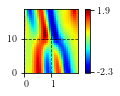

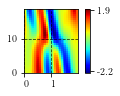

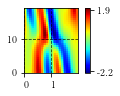

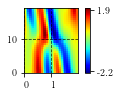

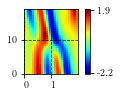

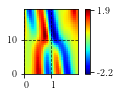

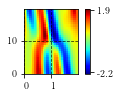

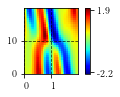

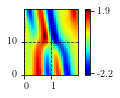

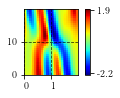

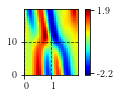

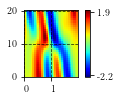

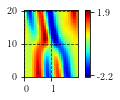

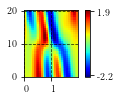

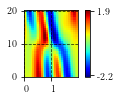

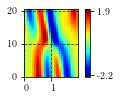

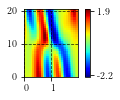

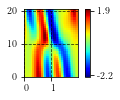

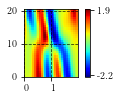

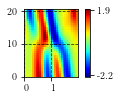

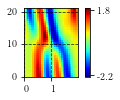

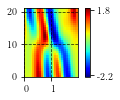

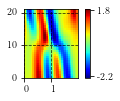

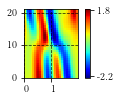

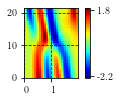

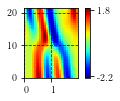

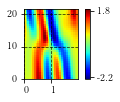

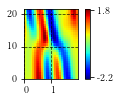

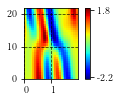

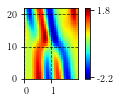

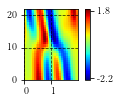

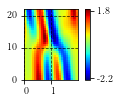

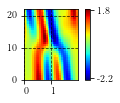

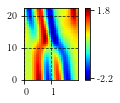

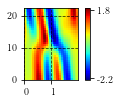

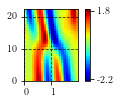

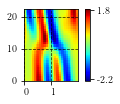

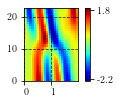

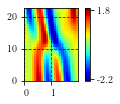

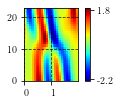

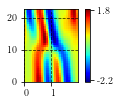

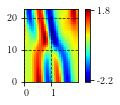

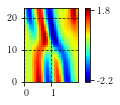

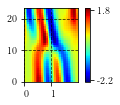

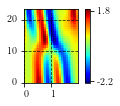

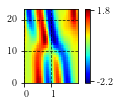

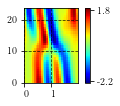

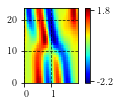

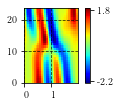

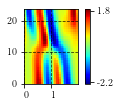

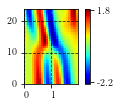

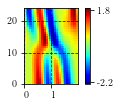

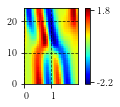

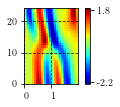

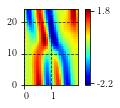

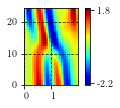

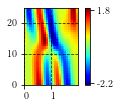

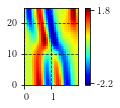

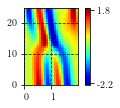

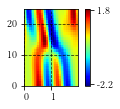

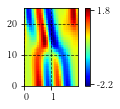

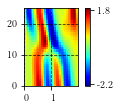

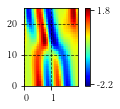

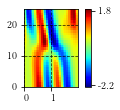

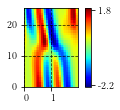

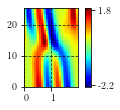

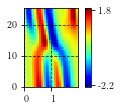

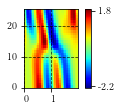

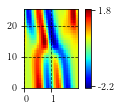

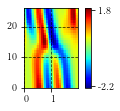

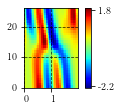

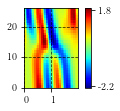

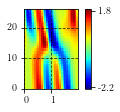

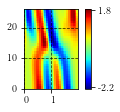

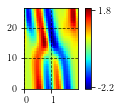

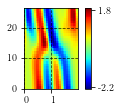

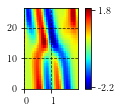

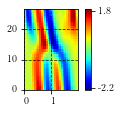

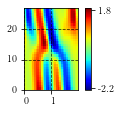

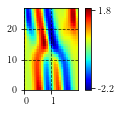

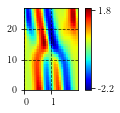

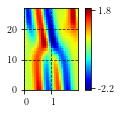

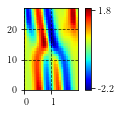

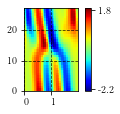

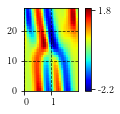

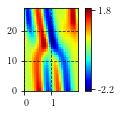

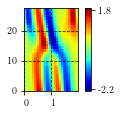

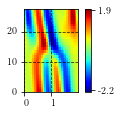

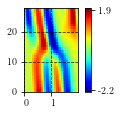

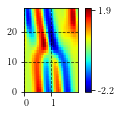

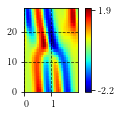

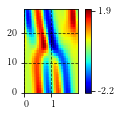

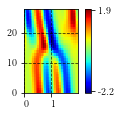

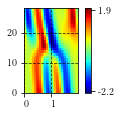

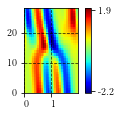

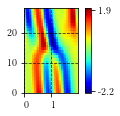

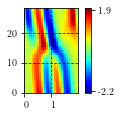

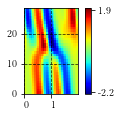

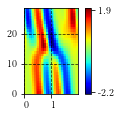

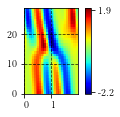

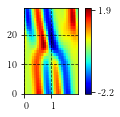

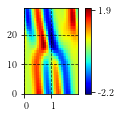

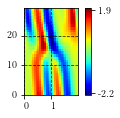

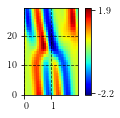

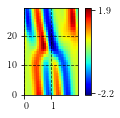

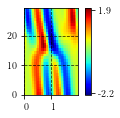

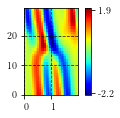

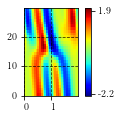

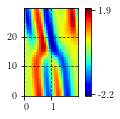

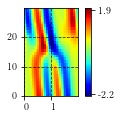

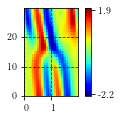

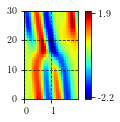

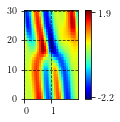

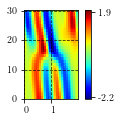

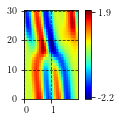

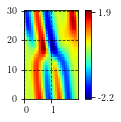

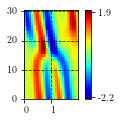

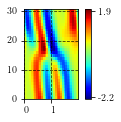

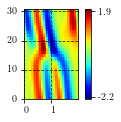

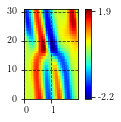

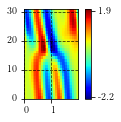

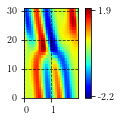

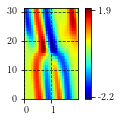

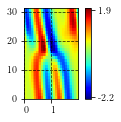

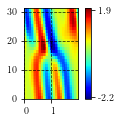

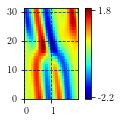

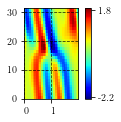

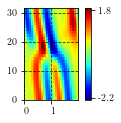

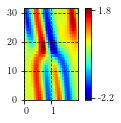

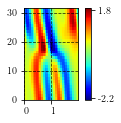

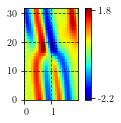

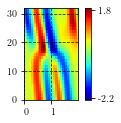

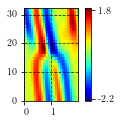

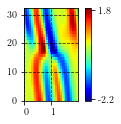

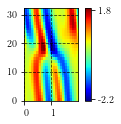

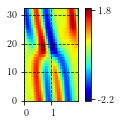

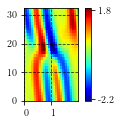

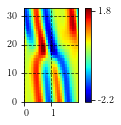

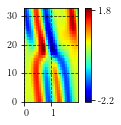

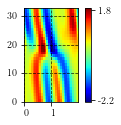

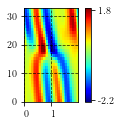

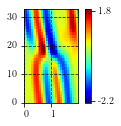

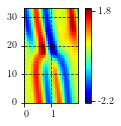

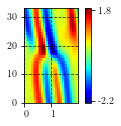

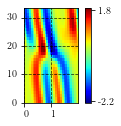

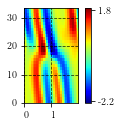

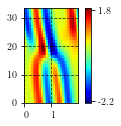

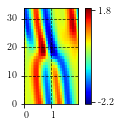

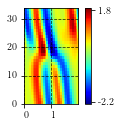

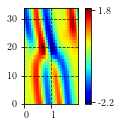

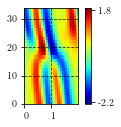

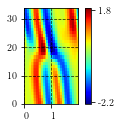

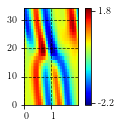

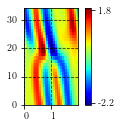

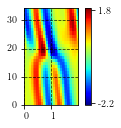

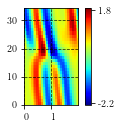

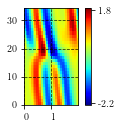

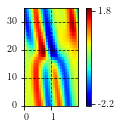

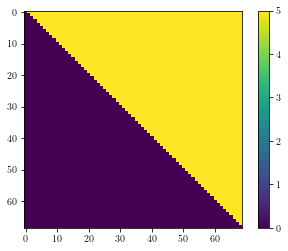

################################################


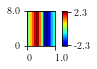

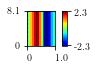

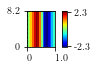

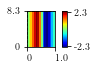

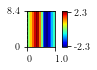

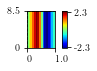

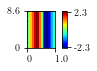

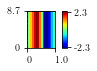

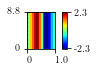

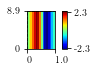

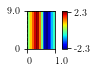

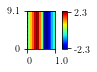

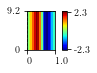

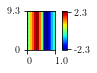

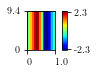

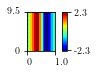

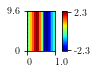

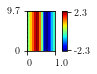

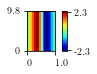

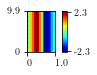

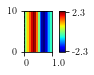

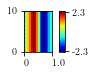

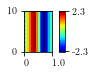

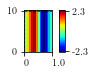

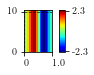

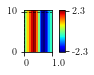

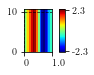

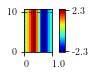

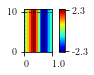

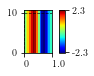

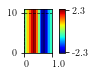

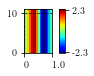

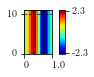

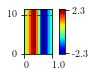

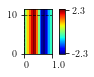

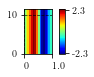

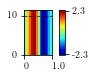

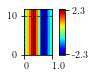

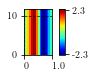

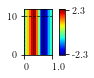

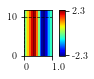

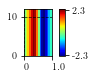

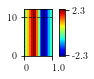

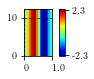

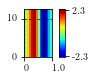

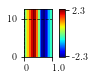

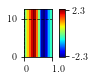

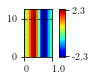

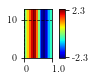

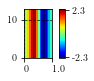

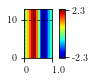

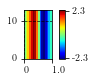

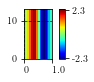

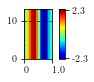

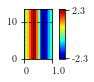

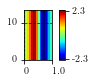

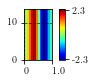

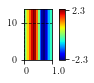

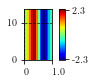

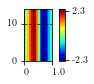

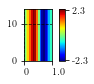

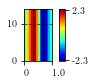

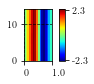

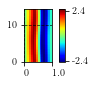

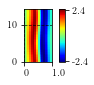

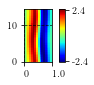

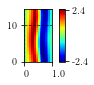

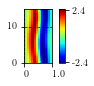

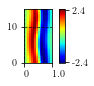

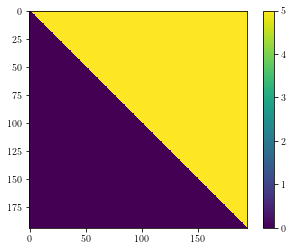

################################################


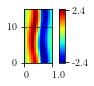

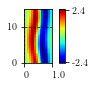

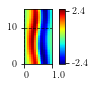

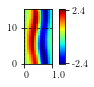

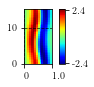

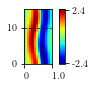

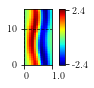

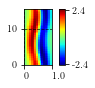

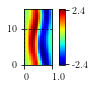

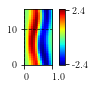

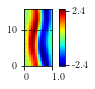

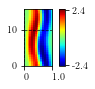

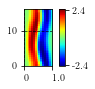

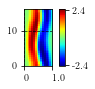

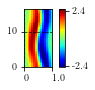

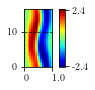

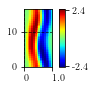

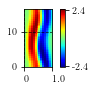

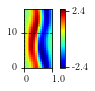

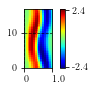

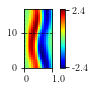

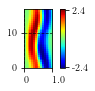

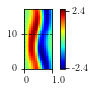

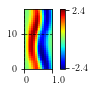

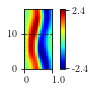

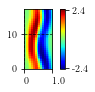

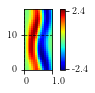

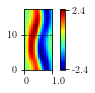

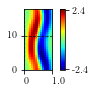

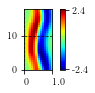

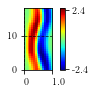

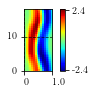

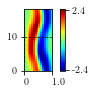

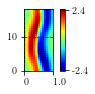

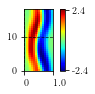

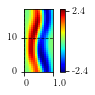

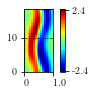

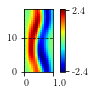

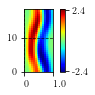

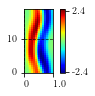

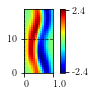

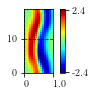

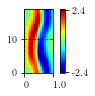

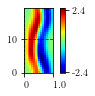

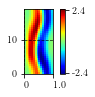

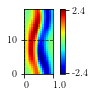

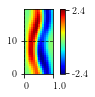

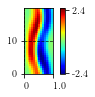

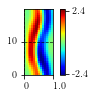

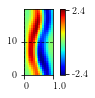

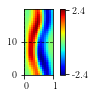

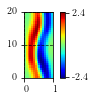

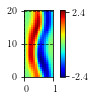

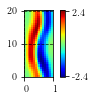

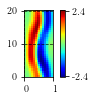

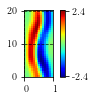

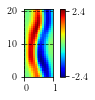

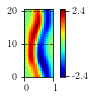

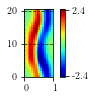

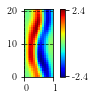

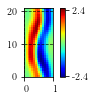

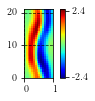

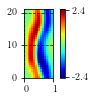

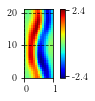

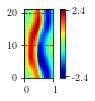

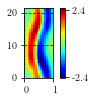

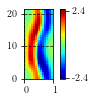

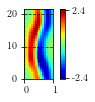

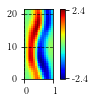

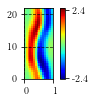

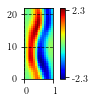

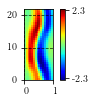

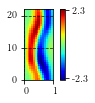

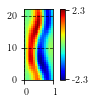

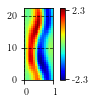

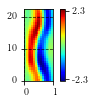

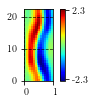

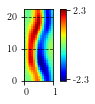

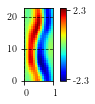

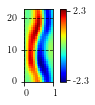

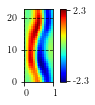

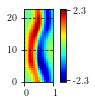

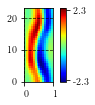

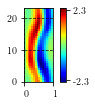

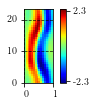

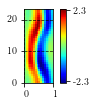

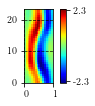

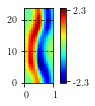

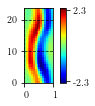

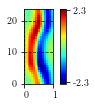

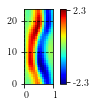

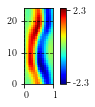

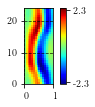

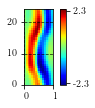

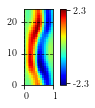

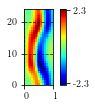

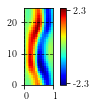

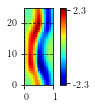

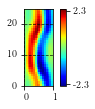

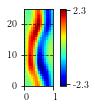

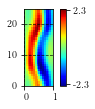

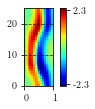

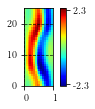

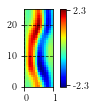

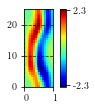

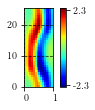

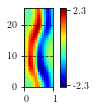

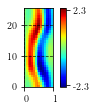

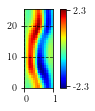

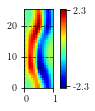

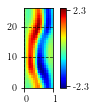

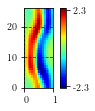

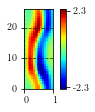

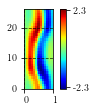

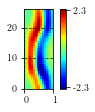

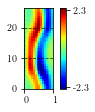

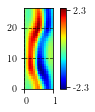

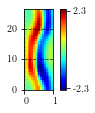

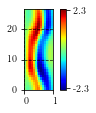

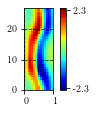

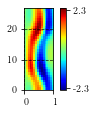

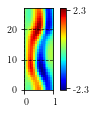

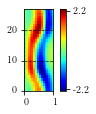

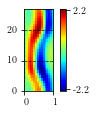

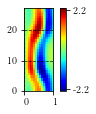

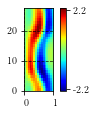

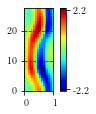

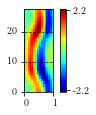

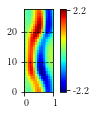

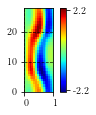

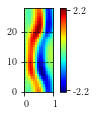

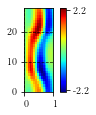

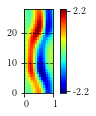

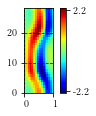

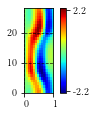

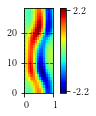

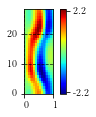

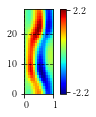

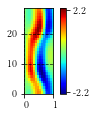

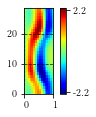

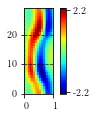

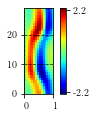

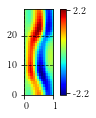

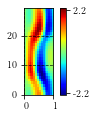

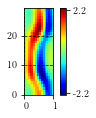

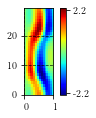

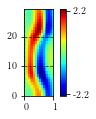

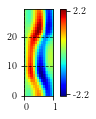

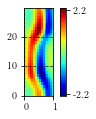

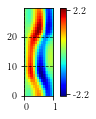

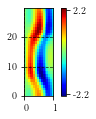

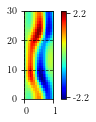

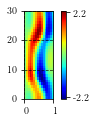

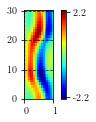

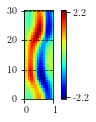

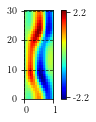

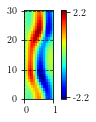

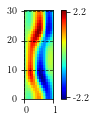

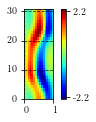

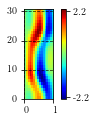

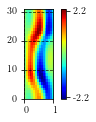

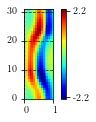

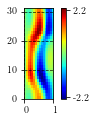

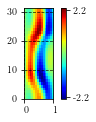

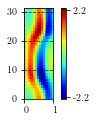

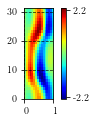

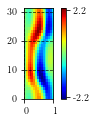

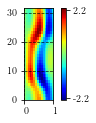

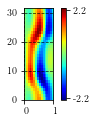

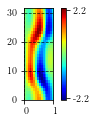

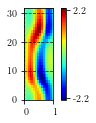

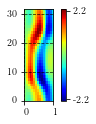

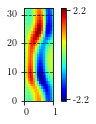

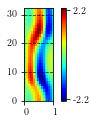

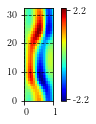

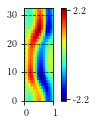

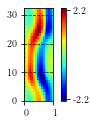

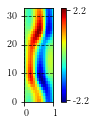

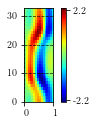

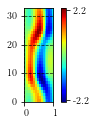

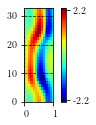

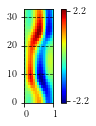

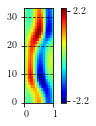

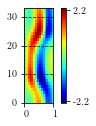

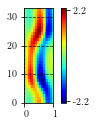

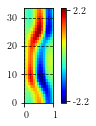

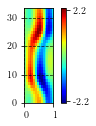

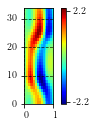

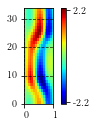

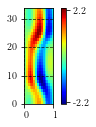

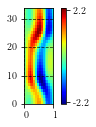

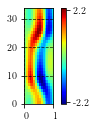

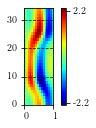

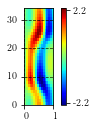

In [27]:
for slc in [slice(0,263), slice(263, 392), slice(392, 616), slice(616, 685), slice(685, None)]:
    plt.figure()
    plt.imshow(truth_values.astype(int)[slc, slc], interpolation='none')
    plt.colorbar()
    plt.show()
    print('################################################')
    for orbit in entire_covering[slc]:
        orbit.to_fundamental_domain().plot(padding=False)

###
(14.30084483218944, 13.03759136983164, -3.398712699303085)


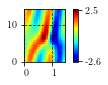

###
(14.419717642897997, 13.174810274046457, -6.732012555306101)


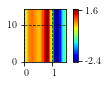

###
(14.88062977524758, 17.56491074861571, -5.673103419938911)


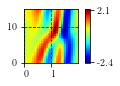

###
(15.400880409356617, 17.434239607152623, 0.0)


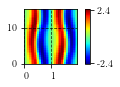

In [51]:
covering_processed = []
for slc in [slice(0,263), slice(263, 392), slice(392, 616), slice(616, 685), slice(685, None)]:
    covering_processed.append(entire_covering[slc])
    
# for slicing purposes
large_covering = [np.array(x) for x in covering_processed]



medium_covering =[np.array(large_covering[0])[100::25],
                                           np.array(large_covering[1])[::25],
                                           np.array(large_covering[2])[:-50:25],
                                           np.array(large_covering[4])[::25]]

small_covering = [np.array(large_covering[0])[100::50],
                                           np.array(large_covering[1])[::50],
                                           np.array(large_covering[2])[:-50:50],
                                           np.array(large_covering[4])[::50]]

minimal_covering = [np.array(large_covering[0])[[-200]],
         np.array(large_covering[1])[[-25]],
         np.array(large_covering[2])[[25]],
         np.array(large_covering[4])[[5]]]

for x in minimal_covering:
    print('###')
    for y in x:
        print(y.parameters)
        y.plot()

In [103]:
def score_array_shape(base_orbit, window_orbit, **kwargs):
    strides = kwargs.get('strides', tuple([1]*len(base_orbit.shapes()[0])))
    score_type = kwargs.get('score_type', 'pointwise')
    # Easiest way I've found to account for periodicity is to pad with wrapped values
    window = window_orbit.state
    base = base_orbit.state

    # To get the padding/wrap number, need to see how much the windows extend "beyond" the base orbit. This can be
    # computed using the placement of the last pivot and the window dimensions. This is only relevant for periodic
    # dimensions in the base orbit. Not specifying min_persistence makes memory requirements very large.

    # The bases orbit periodicity has to do with scoring and whether or not to wrap windows around.
    base_orbit_periodicity = kwargs.get('base_orbit_periodicity', tuple(len(window.shape)*[False]))

    # the periodic_dimensions key here determines the periodic dimensions in the gudhi.PeriodicCubicalComplex
    gudhikwargs = kwargs.get('gudhi_kwargs', {'periodic_dimensions': tuple(len(window.shape)*[False]),
                                              'min_persistence': 0.01})
    dimension_iterator = zip(base.shape, strides, window.shape, base_orbit_periodicity)
    score_array_shape = []
    pad_shape = []
    for base_extent, stride_extent, window_extent, periodic in dimension_iterator:
        # Need to determine the score array and the padding amount, if periodic in that dimension.
        # First pivot position is always at (0, 0), opposite corner is (base_extent-1, base_extent-1)
        # This is really the index of the last pivot along current dimension.
        if periodic:
            num_pivots = ((base_extent-1) // stride_extent) + 1
            spill_over = (window_extent + stride_extent * (num_pivots-1)) - base_extent
            # All pivot points (separated by stride_extent) are admissible with respect to periodic dimensions.
            score_array_shape.append(num_pivots)
            # -1 is a correction for starting at 0 indexing.
            pad_shape.append(spill_over)
        else:
            # If we need padding then the pivot position does not work for aperiodic dimensions. If window extent
            # is large compared to stride then multiple pivots could be out of bounds. Need to reel back until we find
            # one that is not.
            # Extra 1 because iterator provides the index not the number of pivots.
            num_pivots = 1 + (base_extent - window_extent) // stride_extent
            score_array_shape.append(num_pivots)
            pad_shape.append(0)

    # First create an array to store metric values; 1/stride is the sampling fraction, evenly spaced.
    # Want to create the number of pivots based on original array, but to handle "overflow", the wrapped array
    # is used for calculations
    return score_array_shape

strides=(8, 8)
sashape  = score_array_shape(read_h5('large_patches.h5', '1/').resize(832, 832), covering[0][0], base_orbit_periodicity=(False, True), strides=strides)
with h5py.File('base_persistence.h5', 'r') as file:
    base_persistence_load = []
    for j in range(0, sashape[1]):
        for i in range(0, sashape[0]):
            index = strides[0]*i + strides[1]*j
            intv = file[str(index)]['intervals'][...]
            b = file[str(index)]['betti'][...]
            base_persistence_load.append(list(zip(b, intv)))
cache = {(32, 32): base_persistence_load}

In [104]:
len(cache[(32,32)])

10504

In [93]:
len(list(minimal_covering[2][0].group_orbit(rolls=(4,4))))

128

In [52]:
keys = tuple(['defect', 'drifter', 'larger_defect', 'wiggle'])

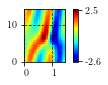

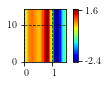

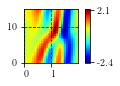

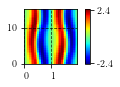

In [54]:
for x in np.concatenate(minimal_covering):
    x.plot()

In [57]:
for name, families in zip(keys, covering_processed):
    for orbit in families:
        orbit.to_h5('large_cover.h5', groupname=name)

for name, families in zip(keys, medium_covering):
    for orbit in families:
        orbit.to_h5('medium_cover.h5', groupname=name)

for name, families in zip(keys, small_covering):
    for orbit in families:
        orbit.to_h5('small_cover.h5', groupname=name)

for name, families in zip(keys, minimal_covering):
    for orbit in families:
        orbit.to_h5('minimal_cover.h5', groupname=name)

Because we have reduced the number of family members by an order of a hundred, we need to increase the sampling rate
to get more accurate statistics. Fundamental domains yes or no?

In [68]:
# score_type='persistence'
# scoring_function = ohgudhi.gudhi_distance_from_persistence
# persistence_function = ohgudhi.orbit_persistence



# wig_fam = [final_cover[-1]]
# # kwargs1 = {
# #           'strides': (256, 256),
# #           'fundamental_domain': False,
# #           'group_orbit': True,
# #           'n_trajectories':1000,
# #           'sampling_rate':10,
# #           'discrete': True
# #            }

# kwargs1 = {
#           'strides': (256, 256),
#           'rolls': (8, 8),
#           'fundamental_domain': False,
#           'group_orbit': True,
#           'n_trajectories':1000,
#           'sampling_rate':10,
#           'continuous': True
#            }
# # defect_group_orbit_scores = produce_scores([final_cover[0][1]], **kwargs)

# kwargs2 = {
#           'strides': (256, 256),
#           'rolls': (8, 8),
#           'fundamental_domain': True,
#           'group_orbit': True,
#           'n_trajectories':1000,
#           'sampling_rate':10,
#           'continuous': True
#            }

# # defect_family_no_group_orbit_scores_fd =produce_scores([final_cover[0][1]], **kwargs)

# kwargs3 = {
#           'strides': (256, 256),
#           'rolls': (8, 8),
#           'fundamental_domain': False,
#           'scoring_function':  scoring_function,
#           'score_type': 'persistence',
#           'persistence_function': persistence_function,
#           'group_orbit': True,
#           'n_trajectories':1000,
#           'sampling_rate':10,
#           'min_persistence':0.1,
#           'continuous': True
#            }
# # defect_family_no_group_orbit_persistence_scores = produce_scores([final_cover[0][1]], **kwargs)



# kwargs4 = {
#           'strides': (256, 256),
#           'rolls': (8, 8),
#           'fundamental_domain': True,
#           'scoring_function':  scoring_function,
#           'score_type': 'persistence',
#           'persistence_function': persistence_function,
#           'group_orbit': True,
#           'n_trajectories':1000,
#           'sampling_rate':10,
#           'min_persistence':0.1,
#           'continuous': True
#            }

# # families = wig_fam
# # family_scores = []
# # print('')
# # print('family ', i)
# # for kwargs in [kwargs1, kwargs2]:
# #     family_scores.append(produce_scores(families, **kwargs))
# # for kwargs in [kwargs3, kwargs4]:
# #     family_scores.append(produce_scores([f.abs() for f in families], **kwargs))

    
# scores = []
# for i, families in enumerate(final_cover):
#     families = [families]
#     family_scores = []
#     print('')
#     print('family ', i)
#     for kwargs in [kwargs1, kwargs2]:
#         family_scores.append(produce_scores(families,bases, **kwargs))
#         print('')
#     for kwargs in [kwargs3, kwargs4]:
#         family_scores.append(produce_scores([f.abs() for f in families], bases, **kwargs))
#         print('')
#     scores.append(family_scores)
    

# sampling_rate = 5
# bases_labels = [str(int(base_num*sampling_rate))for base_num in range(1000//sampling_rate)]
# bases = [y.resize(832, 832) for y in  read_h5('../notebooks/large_trajectory.h5', tuple(bases_labels))]

# test_abs = []
# for kwargs in [kwargs3, kwargs4]:
#     test_abs.append(produce_scores([f for f in [final_cover[0]]], bases, **kwargs))

# test_absw = []
# for kwargs in [kwargs3, kwargs4]:
#     test_absw.append(produce_scores([f for f in [final_cover[-1]]], bases, **kwargs))

# test_absw

# scores = []
# for i, families in enumerate(final_cover[1:]):
#     families = [families]
#     family_scores = []
#     print('')
#     print('family ', i)
#     for kwargs in [kwargs1, kwargs2]:
#         family_scores.append(produce_scores(families,bases, **kwargs))
#         print('')
#     for kwargs in [kwargs3, kwargs4]:
#         family_scores.append(produce_scores([f.abs() for f in families],bases, **kwargs))
#         print('')
#     scores.append(family_scores)
    

# wscr = []
# for f in family_scores:
#     wscr.append(critical_values(f))

# with h5py.File('critical_values.h5', 'r+') as file:
#     file.create_dataset('wiggle', data=wscr)

# critical_vals = []
# for x in scores:
#     plt.figure()
#     cv = []
#     for y in x:
#         cv.append(critical_values(y))
#         plt.hist(y)
#     critical_vals.append(cv)
#     plt.show()
# #     print(np.array(x).shape)

# with h5py.File('critical_values.h5','w') as file:
#     for key, c in zip(keys, critical_vals):
#         file.create_dataset(key, data=np.array(c))

# #### Get the scores for both metrics for both fundamental and physical domains.

# Append these scores to the corresponding groups (families) in the h5 file.

# # hmlscr = np.array([x for famscores in scores for x in famscores[-2:]]).transpose()

# plt.figure(figsize=(12,12))
# for famscores in scores:
# #     for x in famscores[:-2]:
# #         plt.hist(x.ravel(),alpha=0.5)
# #     plt.show()
# #     plt.figure()
#     for x in famscores[-2:]:
#         plt.hist(x.ravel(), alpha=0.7, bins=100)
# plt.show()

# for famscores in scores:
#     for x in famscores:
#         plt.figure()
#         plt.hist(x.ravel())
#         plt.show()

# for famscores in scores:
# #     plt.figure()
# #     for x in famscores[:-2]:
# #         plt.hist(x.ravel(),alpha=0.5)
# #     plt.show()
#     plt.figure()
#     for x in famscores[-2:]:
#         plt.hist(x.ravel(), alpha=0.5)
#     plt.show()

# def save_scores_to_groups(filename, groups, clabels, cvals):
#     with h5py.File(filename, 'r') as file:
#         for i, g in enumerate(groups):
#             for  lab, val in zip(clabels[i], cvals[i]):
#                 file[g].attrs[lab] = val

# clabels = ['critical_values', 'fundamental_domain_critical_values', 'critical_persistence_values', 'fundamental_domain_critical_persistence_values']









# For thresholds, compute the critical values associated with the 0.01%, 0.1%, 1%, 5% percent thresholds.